In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [ ]:
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

In [ ]:
%%time
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

CPU times: user 361 ms, sys: 189 ms, total: 551 ms
Wall time: 989 ms


In [ ]:
airports = pd.read_csv('/content/airports.csv')
airlines = pd.read_csv('/content/airlines.csv')
flights = pd.read_csv('/content/flights.csv', dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str})

**Задание 1.** Найти аэропорт с минимальной задержкой вылета.

In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flights.isna().mean()

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.002530
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.014805
DEPARTURE_DELAY        0.014805
TAXI_OUT               0.015303
WHEELS_OFF             0.015303
SCHEDULED_TIME         0.000001
ELAPSED_TIME           0.018056
AIR_TIME               0.018056
DISTANCE               0.000000
WHEELS_ON              0.015898
TAXI_IN                0.015898
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.015898
ARRIVAL_DELAY          0.018056
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    0.984554
AIR_SYSTEM_DELAY       0.817250
SECURITY_DELAY         0.817250
AIRLINE_DELAY          0.817250
LATE_AIRCRAFT_DELAY    0.817250
WEATHER_DELAY          0.817250
dtype: f

In [ ]:
flights.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1, inplace=True)

In [ ]:
flights=flights.query('DEPARTURE_DELAY>=0')

In [ ]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0
12,2015,1,1,4,DL,1434,N547US,LAX,MSP,35,35.0,0.0,18.0,53.0,214.0,210.0,188.0,1535,601.0,4.0,609,605.0,-4.0,0,0
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,120.0,25.0,11.0,131.0,162.0,143.0,128.0,1139,539.0,4.0,537,543.0,6.0,0,0
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819070,2015,12,31,4,B6,80,N584JB,RNO,JFK,2359,2359.0,0.0,12.0,11.0,306.0,285.0,268.0,2411,739.0,5.0,805,744.0,-21.0,0,0
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,15.0,16.0,14.0,29.0,249.0,250.0,211.0,1931,600.0,25.0,608,625.0,17.0,0,0
5819072,2015,12,31,4,B6,98,N607JB,DEN,JFK,2359,6.0,7.0,13.0,19.0,211.0,193.0,173.0,1626,512.0,7.0,530,519.0,-11.0,0,0
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,15.0,16.0,9.0,24.0,227.0,214.0,190.0,1826,534.0,15.0,546,549.0,3.0,0,0


In [ ]:
def date(df):
    return datetime.date(df.YEAR, df.MONTH, df.DAY)

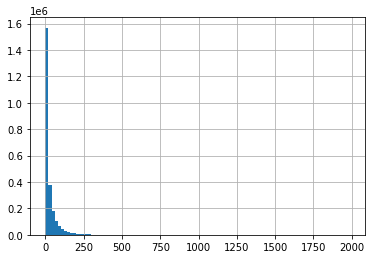

In [ ]:
flights.DEPARTURE_DELAY.hist(bins=100)

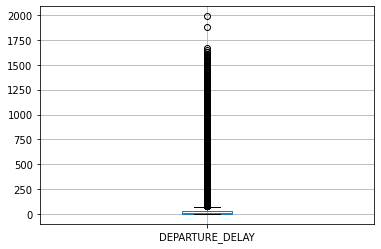

In [ ]:
flights.boxplot("DEPARTURE_DELAY")

In [ ]:
delays=flights[['ORIGIN_AIRPORT','DEPARTURE_DELAY']]

In [ ]:
delays=delays.merge(airports, how='inner', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [ ]:
delays

,ORIGIN_AIRPORT,DEPARTURE_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,LAX,14.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
1,LAX,0.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,LAX,0.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
3,LAX,10.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,LAX,7.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
...,...,...,...,...,...,...,...,...,...
2280136,HYA,21.0,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
2280137,HYA,0.0,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
2280138,HYA,8.0,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
2280139,HYA,16.0,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036


In [ ]:
delays.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().head(20)

AIRPORT
Westerly State Airport                          11.425287
King Salmon Airport                             12.176471
Hilo International Airport                      14.558691
Dillingham Airport                              16.375000
Canyonlands Field                               17.533333
Lewiston-Nez Perce County Airport               17.809524
Honolulu International Airport                  19.090463
Kahului Airport                                 20.104969
Lihue Airport                                   20.126803
Kona International Airport at Keahole           20.164379
Gillette-Campbell County Airport                20.940559
Seattle-Tacoma International Airport            21.438485
John Wayne Airport (Orange County Airport)      21.544000
Oakland International Airport                   21.857390
Brainerd Lakes Regional Airport                 22.086614
Dallas Love Field                               22.201138
Kodiak Airport                                  22.264286
Magic 

In [ ]:
delays.groupby('AIRPORT')['DEPARTURE_DELAY'].median().sort_values().head(20)

AIRPORT
Aberdeen Regional Airport                       0.0
Westerly State Airport                          0.0
Chippewa County International Airport           0.0
Pellston Regional Airport of Emmet County       0.0
Delta County Airport                            0.0
Bemidji Regional Airport                        0.0
Brainerd Lakes Regional Airport                 3.0
Lewiston-Nez Perce County Airport               3.0
Helena Regional Airport                         3.0
Bangor International Airport                    5.0
Flagstaff Pulliam Airport                       5.0
Gillette-Campbell County Airport                5.0
Bellingham International Airport                5.0
Pocatello Regional Airport                      5.0
Lea County Regional Airport                     6.0
Lihue Airport                                   6.0
Magic Valley Regional Airport (Joslin Field)    6.0
Canyonlands Field                               6.0
Rhinelander-Oneida County Airport               6.0
St. 

При среднем распреределении данных мы видим много выбросов. Поэтому я использовал медианное распределение данных, оно является более устойчивым к выбросам. При медианном распределении данных, получается 6 аэропортов с наименьшей задержкой вылета, такие как : Aberdeen Regional Airport,Westerly State Airport, Chippewa County International Airport, Pellston Regional Airport of Emmet County,Delta County Airport,Bemidji Regional Airport.

**Задание 2.** Самая пунктуальная авиакомпания на прилет в Los Angeles 

In [ ]:
flights=flights.query('ARRIVAL_DELAY>=0')

In [ ]:
flights.head() 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,120.0,25.0,11.0,131.0,162.0,143.0,128.0,1139,539.0,4.0,537,543.0,6.0,0,0
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0
29,2015,1,1,4,AA,2392,N3HRAA,DEN,MIA,120,141.0,21.0,12.0,153.0,227.0,208.0,188.0,1709,701.0,8.0,707,709.0,2.0,0,0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0


In [ ]:
delay_LA=flights[['AIRLINE','ARRIVAL_DELAY','DESTINATION_AIRPORT']]

In [ ]:
delay_LA

,AIRLINE,ARRIVAL_DELAY,DESTINATION_AIRPORT
20,NK,6.0,MCI
27,NK,25.0,FLL
29,AA,2.0,MIA
30,NK,43.0,ORD
35,HA,15.0,HNL
...,...,...,...
5819057,NK,28.0,BQN
5819069,B6,159.0,JFK
5819071,B6,17.0,MCO
5819073,B6,3.0,JFK


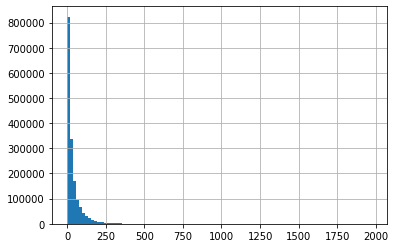

In [ ]:
delay_LA.ARRIVAL_DELAY.hist(bins=100)

In [ ]:
delay_LA=delay_LA.merge(airlines, how='inner', left_on='AIRLINE', right_on='IATA_CODE')

In [ ]:
delay_LA

,AIRLINE_x,ARRIVAL_DELAY,DESTINATION_AIRPORT,IATA_CODE,AIRLINE_y
0,NK,6.0,MCI,NK,Spirit Air Lines
1,NK,25.0,FLL,NK,Spirit Air Lines
2,NK,43.0,ORD,NK,Spirit Air Lines
3,NK,86.0,RSW,NK,Spirit Air Lines
4,NK,35.0,FLL,NK,Spirit Air Lines
...,...,...,...,...,...
1650835,VX,36.0,LAS,VX,Virgin America
1650836,VX,9.0,OGG,VX,Virgin America
1650837,VX,11.0,LAS,VX,Virgin America
1650838,VX,16.0,SFO,VX,Virgin America


In [ ]:
delay_LA=delay_LA.query('DESTINATION_AIRPORT=="LAX"')

In [ ]:
delay_LA

,AIRLINE_x,ARRIVAL_DELAY,DESTINATION_AIRPORT,IATA_CODE,AIRLINE_y
81,NK,15.0,LAX,NK,Spirit Air Lines
99,NK,66.0,LAX,NK,Spirit Air Lines
198,NK,60.0,LAX,NK,Spirit Air Lines
207,NK,9.0,LAX,NK,Spirit Air Lines
238,NK,30.0,LAX,NK,Spirit Air Lines
...,...,...,...,...,...
1650820,VX,21.0,LAX,VX,Virgin America
1650821,VX,22.0,LAX,VX,Virgin America
1650823,VX,57.0,LAX,VX,Virgin America
1650827,VX,22.0,LAX,VX,Virgin America


In [ ]:
delay_LA.groupby('AIRLINE_y')['ARRIVAL_DELAY'].mean().sort_values().head(20)

AIRLINE_y
Hawaiian Airlines Inc.          27.681661
Alaska Airlines Inc.            31.272926
Southwest Airlines Co.          31.714268
US Airways Inc.                 32.753131
Virgin America                  34.313616
Delta Air Lines Inc.            37.035678
JetBlue Airways                 39.427495
United Air Lines Inc.           39.985836
Frontier Airlines Inc.          39.987037
Skywest Airlines Inc.           42.450573
American Airlines Inc.          46.135724
Spirit Air Lines                49.086823
American Eagle Airlines Inc.    61.400000
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
delay_LA.groupby('AIRLINE_y')['ARRIVAL_DELAY'].median().sort_values().head(20)

AIRLINE_y
Hawaiian Airlines Inc.          12.0
Alaska Airlines Inc.            18.0
Delta Air Lines Inc.            18.0
Southwest Airlines Co.          19.0
Virgin America                  19.0
United Air Lines Inc.           20.0
US Airways Inc.                 21.0
American Airlines Inc.          24.0
JetBlue Airways                 24.0
Skywest Airlines Inc.           24.0
Frontier Airlines Inc.          25.0
American Eagle Airlines Inc.    29.5
Spirit Air Lines                31.0
Name: ARRIVAL_DELAY, dtype: float64

При среднем распреределении данных и при медианном, мы видим, что самая пунктуальная компания на прилет в Los Angeles International Airport является Hawaiian Airlines Inc.

**Задача 3.** Аэропорт с самой большой долей руления на 1 самолетовылет.

In [ ]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,120.0,25.0,11.0,131.0,162.0,143.0,128.0,1139,539.0,4.0,537,543.0,6.0,0,0
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0
29,2015,1,1,4,AA,2392,N3HRAA,DEN,MIA,120,141.0,21.0,12.0,153.0,227.0,208.0,188.0,1709,701.0,8.0,707,709.0,2.0,0,0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,11.0,13.0,15.0,26.0,140.0,155.0,121.0,982,327.0,19.0,318,346.0,28.0,0,0
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,238.0,159.0,34.0,312.0,282.0,282.0,243.0,2248,1015.0,5.0,741,1020.0,159.0,0,0
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,15.0,16.0,14.0,29.0,249.0,250.0,211.0,1931,600.0,25.0,608,625.0,17.0,0,0
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,15.0,16.0,9.0,24.0,227.0,214.0,190.0,1826,534.0,15.0,546,549.0,3.0,0,0


In [ ]:
Taxi=flights[['ORIGIN_AIRPORT','TAXI_OUT']]

In [ ]:
Taxi

,ORIGIN_AIRPORT,TAXI_OUT
20,LAS,11.0
27,MSP,14.0
29,DEN,12.0
30,PHX,9.0
35,LAS,16.0
...,...,...
5819057,FLL,15.0
5819069,LAS,34.0
5819071,SLC,14.0
5819073,ABQ,9.0


In [ ]:
Taxi=Taxi.merge(airports, how='inner', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [ ]:
Taxi=Taxi.drop('IATA_CODE', axis=1)

In [ ]:
Taxi

,ORIGIN_AIRPORT,TAXI_OUT,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,LAS,11.0,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
1,LAS,16.0,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
2,LAS,11.0,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
3,LAS,11.0,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
4,LAS,15.0,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233
...,...,...,...,...,...,...,...,...
1546259,HYA,8.0,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
1546260,HYA,24.0,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
1546261,HYA,10.0,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036
1546262,HYA,9.0,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036


In [ ]:
Taxi.groupby('AIRPORT')['TAXI_OUT'].agg({'sum','count','mean'}).sort_values('mean',ascending=False)

,count,mean,sum
AIRPORT,,,
John F. Kennedy International Airport (New York International Airport),25494,32.138974,819351.0
LaGuardia Airport (Marine Air Terminal),27371,31.988199,875549.0
Brainerd Lakes Regional Airport,84,27.619048,2320.0
Philadelphia International Airport,18181,26.148892,475413.0
Newark Liberty International Airport,30081,23.703766,713033.0
...,...,...,...
Deadhorse Airport (Prudhoe Bay Airport),232,7.379310,1712.0
Nome Airport,252,7.242063,1825.0
Wrangell Airport,188,7.196809,1353.0


Аэропорт с самой большой долей руления на 1 самолетовылет при среднем значении для сравнения является "John F. Kennedy International Airport (New York International Airport)".

**Задание 4.** Построить модель которая будет выбирать топ 3 аэропорта прилета, в зависимости от аэропорта вылета.


In [ ]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def make_date(df):
    return datetime.date(df.YEAR, df.MONTH, df.DAY)

In [ ]:
flights['DATE']=flights.apply(make_date,axis=1)

In [ ]:
df_model=flights[['DESTINATION_AIRPORT','ARRIVAL_DELAY', 'DATE', 'ORIGIN_AIRPORT']]

In [ ]:
df_model=df_model.query('ARRIVAL_DELAY>=0')

In [ ]:
df_model=df_model.merge(airports, how='inner', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

In [ ]:
df_model['DESTINATION_AIRPORT'].unique()

array(['CLT', 'MSP', 'MCI', 'MIA', 'FLL', 'ORD', 'ATL', 'HNL', 'JFK',
       'DFW', 'EWR', 'MCO', 'BDL', 'PHX', 'SEA', 'SFO', 'KOA', 'IAH',
       'DEN', 'SJU', 'LAX', 'DTW', 'IAD', 'LGA', 'HOU', 'PHL', 'BOS',
       'SLC', 'TTN', 'RSW', 'LAS', 'TPA', 'PIT', 'MYR', 'MSY', 'SJC',
       'DCA', 'DAL', 'ITO', 'RDU', 'BNA', 'OGG', 'JAX', 'DSM', 'PDX',
       'BWI', 'BOI', 'ELP', 'MDW', 'MKE', 'CLD', 'KTN', 'LIH', 'SMF',
       'ANC', 'CVG', 'SAN', 'IND', 'DAY', 'AUS', 'BUR', 'COS', 'BZN',
       'SNA', 'HRL', 'HDN', 'MEM', 'GEG', 'BUF', 'SYR', 'ACY', 'SAT',
       'LBB', 'STL', 'PSP', 'TUS', 'ASE', 'HSV', 'GSO', 'YUM', 'ABQ',
       'EGE', 'BTR', 'STT', 'MMH', 'CEC', 'SBP', 'SBA', 'LAN', 'CLE',
       'SRQ', 'OKC', 'DLH', 'SDF', 'TUL', 'LGB', 'PVD', 'MFE', 'LFT',
       'AGS', 'ROC', 'ISN', 'OAK', 'ONT', 'CRP', 'BPT', 'FSD', 'PBI',
       'CMH', 'WRG', 'MSN', 'FLG', 'SAV', 'FCA', 'GJT', 'BTM', 'JMS',
       'MLI', 'GUC', 'EYW', 'FAR', 'SGF', 'XNA', 'LIT', 'MOT', 'GRR',
       'RAP', 'MOB',

In [ ]:
example=df_model.query('DESTINATION_AIRPORT=="CLT"')[['ARRIVAL_DELAY','DATE']]

In [ ]:
example['DATE']=example['DATE'].astype('datetime64')

In [ ]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.DATE.dt.year
    data['month'] = data.DATE.dt.month
    data['day'] = data.DATE.dt.day
    data['dayofweek'] = data.DATE.dt.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)

In [ ]:
make_features(example,5,2)

In [ ]:
example=example.set_index('DATE').sort_index()

In [ ]:
example.dropna(inplace=True)

In [ ]:
example

,ARRIVAL_DELAY,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5
DATE,,,,,,,,,,
2015-01-01,11.0,2015,1,1,3,23.0,2.0,4.0,15.0,5.0
2015-01-01,11.0,2015,1,1,3,11.0,23.0,2.0,4.0,15.0
2015-01-01,6.0,2015,1,1,3,11.0,11.0,23.0,2.0,4.0
2015-01-01,2.0,2015,1,1,3,6.0,11.0,11.0,23.0,2.0
2015-01-01,16.0,2015,1,1,3,2.0,6.0,11.0,11.0,23.0
...,...,...,...,...,...,...,...,...,...,...
2015-12-31,12.0,2015,12,31,3,7.0,37.0,4.0,3.0,0.0
2015-12-31,6.0,2015,12,31,3,12.0,7.0,37.0,4.0,3.0
2015-12-31,1.0,2015,12,31,3,6.0,12.0,7.0,37.0,4.0


In [ ]:
x=example.drop('ARRIVAL_DELAY',axis=1)
y=example['ARRIVAL_DELAY']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.25)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mean_squared_error(y_train,model.predict(x_train))**0.5

40.1982891933363

In [ ]:
mean_squared_error(y_test,model.predict(x_test))**0.5

40.698423683297925

In [ ]:
cikl=[]
for airport in df_model['DESTINATION_AIRPORT'].unique():
   example=df_model.query('DESTINATION_AIRPORT==@airport')[['ARRIVAL_DELAY','DATE']]
   example['DATE']=example['DATE'].astype('datetime64')
   make_features(example,5,2)
   example=example.set_index('DATE').sort_index()
   example.dropna(inplace=True)
   x=example.drop('ARRIVAL_DELAY',axis=1)
   y=example['ARRIVAL_DELAY']
   x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.25)
   model=LinearRegression()
   model.fit(x_train,y_train)
   RMSE=mean_squared_error(y_test,model.predict(x_test))**0.5
   cikl.append([airport,y_test.mean(),RMSE])

In [ ]:
prediction=pd.DataFrame(cikl,columns=['AIRPORT','MEAN_DELAY','RMSE'])

In [ ]:
prediction

,AIRPORT,MEAN_DELAY,RMSE
0,CLT,22.955966,40.698424
1,MSP,29.311842,58.604767
2,MCI,26.478372,40.384750
3,MIA,31.313706,64.085795
4,FLL,29.433476,45.346746
...,...,...,...
317,WYS,5.575758,7.965298
318,AKN,10.000000,9.738939
319,DLG,5.750000,717.953170
320,GST,22.800000,28.358365


In [ ]:
start_airport=df_model['ORIGIN_AIRPORT'].sample().values[0]
df_model.query('ORIGIN_AIRPORT==@start_airport')['DESTINATION_AIRPORT'].unique()
top3=pd.DataFrame(df_model.query('ORIGIN_AIRPORT==@start_airport')['DESTINATION_AIRPORT'].unique(),columns=['DESTINATION_AIRPORT'])
top3=top3.merge(prediction, how='inner', left_on='DESTINATION_AIRPORT', right_on='AIRPORT')
top3=top3.sort_values(by=['RMSE','MEAN_DELAY'],ascending=[True,True]).head(3)
top3=top3.drop('AIRPORT',axis=1)
print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3)

Лучшие направления с аэропорта DAL

   DESTINATION_AIRPORT  MEAN_DELAY       RMSE
34                 SNA   21.024555  33.177811
50                 AMA   19.793028  33.510919
42                 OAK   23.951168  34.276389


Построена модель расчета нахождения для выбранного аэропорта наиболее эффективных аэропортов прилета по времени с минимальной задержкой рейса. На данном примере, мы можем рассмотреть топ 3 лучших аэропортов прилета для "DAL", которыми являются: SNA, AMA, OAK. 

В данной работе мы находили средние значения, строили цикл и модель, что позвоволило решить нам все 4 поставленные задачи и получить на них исчерпывающий ответ. В задании 1, при медианном распределении данных, получается 6 аэропортов с наименьшей задержкой вылета, такие как : Aberdeen Regional Airport,Westerly State Airport, Chippewa County International Airport, Pellston Regional Airport of Emmet County,Delta County Airport,Bemidji Regional Airport. В задании 2 при среднем распреределении данных и при медианном, мы видим, что самая пунктуальная компания на прилет в Los Angeles International Airport является Hawaiian Airlines Inc. В задании 3, аэропорт с самой большой долей руления на 1 самолетовылет при среднем значении для сравнения является "John F. Kennedy International Airport (New York International Airport)". В задании 4 построил модель, которая выбирает топ 3 аэропорта прилета, с минимальной вероятностью опоздания, в зависимости от аэропорта вылета.На примере выше, мы можем рассмотреть топ 3 лучших аэропортов прилета для воздушной гавани "DAL", которыми являются: SNA, AMA, OAK.